## Describing Data set

In [19]:
from collections import Counter
import matplotlib.pyplot as plt
from typing import List

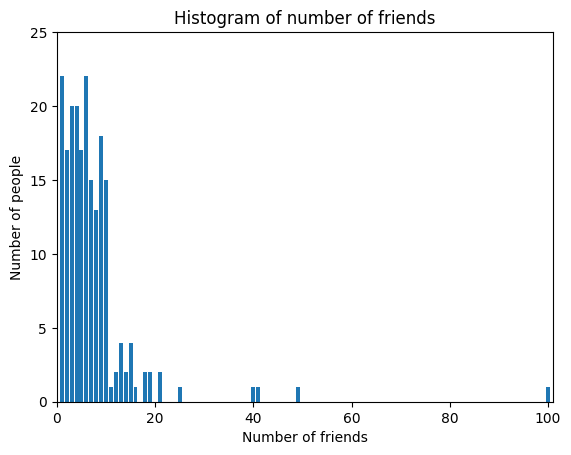

In [20]:
# Generate a list of 204 random integers between 1 and 100
num_friends = [
	100.0,
	49,
	41,
	40,
	25,
	21,
	21,
	19,
	19,
	18,
	18,
	16,
	15,
	15,
	15,
	15,
	14,
	14,
	13,
	13,
	13,
	13,
	12,
	12,
	11,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	10,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	9,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	8,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	7,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	6,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	5,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	4,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	3,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	2,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
	1,
]

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of number of friends')
plt.xlabel('Number of friends')
plt.ylabel('Number of people')
plt.show()

In [21]:
num_points = len(num_friends)
num_points

204

In [22]:
largest = max(num_friends)
largest

100.0

In [23]:
smallest = min(num_friends)
smallest

1

In [24]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

In [25]:
def mean(xs: list) -> float:
	return sum(xs) / len(xs)


mean(num_friends)

7.333333333333333

> The underscore indicates that these are _private_ functions, as they're intended and not to be used by other people

In [26]:
def _median_odd(xs: list) -> float:
	"""returns the median of a list with an odd number of elements, and the median is the middle element"""
	return sorted(xs)[len(xs) // 2]


def _median_even(xs: list) -> float:
	"""returns the median of a list with an even number of elements, and the median is the average of the two middle elements"""
	sorted_xs = sorted(xs)
	hi_midpoint = len(xs) // 2
	return (sorted_xs[hi_midpoint] + sorted_xs[hi_midpoint - 1]) / 2


def median(v: List[float]) -> float:
	"""returns the median of a list"""

	return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)


assert median([1, 10, 2, 9, 5]) == 5, 'Median of odd-length list should be 5'
assert median([1, 9, 2, 10]) == (2 + 9) / 2, (
	'Median of even-length list should be (2 + 9) / 2'
)

In [27]:
print(f'Median of num_friends: {median(num_friends)}')

Median of num_friends: 6.0


In [28]:
def quantile(xs: List[float], p: float) -> float:
	"""returns the pth percentile of a list"""
	p_index = int(p * len(xs))
	return sorted(xs)[p_index]


assert quantile(num_friends, 0.10) == 1, '10th percentile should be 1'
assert quantile(num_friends, 0.25) == 3, '25th percentile should be 3'
assert quantile(num_friends, 0.75) == 9, '75th percentile should be 10'
assert quantile(num_friends, 0.90) == 13, '90th percentile should be 15'

In [29]:
def mode(x: List[float]) -> float:
	"""returns the mode of a list"""
	count = Counter(x)
	max_count = max(count.values())
	return [x_i for x_i, count_i in count.items() if count_i == max_count]


assert set(mode(num_friends)) == {1, 6}

In [30]:
# "range" is the difference between the largest and smallest values
def data_range(x: List[float]) -> float:
	"""returns the range of a list"""
	return max(x) - min(x)


assert data_range(num_friends) == 99, 'Range should be 99'

In [31]:
import sys
from pathlib import Path

notebook_dir = Path().resolve()
root_dir = notebook_dir.parent  # Adjust this based on your directory structure
sys.path.append(str(root_dir))

from scratch.linear_algebra import sum_of_squares

In [32]:
def de_mean(x: List[float]) -> List[float]:
	"""Translates x by subtracting its mean (center the data at 0)"""
	x_bar = mean(x)
	return [x_i - x_bar for x_i in x]


def variance(xs: List[float]) -> float:
	"""Almost the average of the squared deviations from the mean"""

	assert len(xs) >= 2, 'variance requires at least two elements'

	n = len(xs)
	deviations = de_mean(xs)
	return sum_of_squares(deviations) / (n - 1)


assert 81.54 < variance(num_friends) < 81.55, 'variance should be about 81.54'

In [33]:
import math


def standard_deviation(xs: List[float]) -> float:
	"""The square root of the variance"""
	return math.sqrt(variance(xs))


assert 9.03 < standard_deviation(num_friends) < 9.04, (
	'standard deviation should be about 9.03'
)

In [34]:
def interquartile_range(xs: List[float]) -> float:
	"""The difference between the 75th and 25th percentiles"""
	return quantile(xs, 0.75) - quantile(xs, 0.25)


assert interquartile_range(num_friends) == 6, 'IQR should be 6'

In [36]:
from scratch.linear_algebra import dot

daily_minutes = [
	1,
	68.77,
	51.25,
	52.08,
	38.36,
	44.54,
	57.13,
	51.4,
	41.42,
	31.22,
	34.76,
	54.01,
	38.79,
	47.59,
	49.1,
	27.66,
	41.03,
	36.73,
	48.65,
	28.12,
	46.62,
	35.57,
	32.98,
	35,
	26.07,
	23.77,
	39.73,
	40.57,
	31.65,
	31.21,
	36.32,
	20.45,
	21.93,
	26.02,
	27.34,
	23.49,
	46.94,
	30.5,
	33.8,
	24.23,
	21.4,
	27.94,
	32.24,
	40.57,
	25.07,
	19.42,
	22.39,
	18.42,
	46.96,
	23.72,
	26.41,
	26.97,
	36.76,
	40.32,
	35.02,
	29.47,
	30.2,
	31,
	38.11,
	38.18,
	36.31,
	21.03,
	30.86,
	36.07,
	28.66,
	29.08,
	37.28,
	15.28,
	24.17,
	22.31,
	30.17,
	25.53,
	19.85,
	35.37,
	44.6,
	17.23,
	13.47,
	26.33,
	35.02,
	32.09,
	24.81,
	19.33,
	28.77,
	24.26,
	31.98,
	25.73,
	24.86,
	16.28,
	34.51,
	15.23,
	39.72,
	40.8,
	26.06,
	35.76,
	34.76,
	16.13,
	44.04,
	18.03,
	19.65,
	32.62,
	35.59,
	39.43,
	14.18,
	35.24,
	40.13,
	41.82,
	35.45,
	36.07,
	43.67,
	24.61,
	20.9,
	21.9,
	18.79,
	27.61,
	27.21,
	26.61,
	29.77,
	20.59,
	27.53,
	13.82,
	33.2,
	25,
	33.1,
	36.65,
	18.63,
	14.87,
	22.2,
	36.81,
	25.53,
	24.62,
	26.25,
	18.21,
	28.08,
	19.42,
	29.79,
	32.8,
	35.99,
	28.32,
	27.79,
	35.88,
	29.06,
	36.28,
	14.1,
	36.63,
	37.49,
	26.9,
	18.58,
	38.48,
	24.48,
	18.95,
	33.55,
	14.24,
	29.04,
	32.51,
	25.63,
	22.22,
	19,
	32.73,
	15.16,
	13.9,
	27.2,
	32.01,
	29.27,
	33,
	13.74,
	20.42,
	27.32,
	18.23,
	35.35,
	28.48,
	9.08,
	24.62,
	20.12,
	35.26,
	19.92,
	31.02,
	16.49,
	12.16,
	30.7,
	31.22,
	34.65,
	13.13,
	27.51,
	33.2,
	31.57,
	14.1,
	33.42,
	17.44,
	10.12,
	24.42,
	9.82,
	23.39,
	30.93,
	15.03,
	21.67,
	31.09,
	33.29,
	22.61,
	26.89,
	23.48,
	8.38,
	27.81,
	32.35,
	23.84,
]

daily_hours = [dm / 60 for dm in daily_minutes]


def covariance(xs: List[float], ys: List[float]) -> float:
	"""The average of the products of the deviations of x and y from their respective means"""
	assert len(xs) == len(ys), 'xs and ys must be the same length'
	assert len(xs) >= 2, 'covariance requires at least two elements'

	n = len(xs)
	return dot(de_mean(xs), de_mean(ys)) / (n - 1)


assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [37]:
def correlation(xs: List[float], ys: List[float]) -> float:
	"""The covariance of x and y divided by the product of their standard deviations"""
	stdev_x = standard_deviation(xs)
	stdev_y = standard_deviation(ys)
	if stdev_x > 0 and stdev_y > 0:
		return covariance(xs, ys) / stdev_x / stdev_y
	else:
		return 0


assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25